In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Team data files
hof_path = 'HOF.csv'
player_awards_path = 'AwardsPlayers.csv'
coach_awards_path = 'AwardsCoaches.csv'
nhl_team_path = 'Teams.csv'
master_path = 'Master.csv'

# Read the mouse data and the study results
nhl_team_data = pd.read_csv(nhl_team_path)
player_awards_data = pd.read_csv(player_awards_path)
hof_data = pd.read_csv(hof_path)
coach_awards_data = pd.read_csv(coach_awards_path)
master_data = pd.read_csv(master_path)
# Display the data table for preview
#nhl_team_data.head()

# Merge data
#merged_data = pd.merge(coach_awards_data, player_awards_data, on='lgID')

player_awards_data.head()


,playerID,award,year,lgID,note,pos
0,malonjo01,Art Ross,1917,NHL,NaN,NaN
1,cleghod01,Art Ross,1918,NHL,NaN,NaN
2,malonjo01,Art Ross,1919,NHL,NaN,NaN
3,lalonne01,Art Ross,1920,NHL,NaN,NaN
4,broadpu01,Art Ross,1921,NHL,NaN,NaN


In [5]:
# check for duplicates. there are many
columns_to_check_duplicates = ['year', 'playerID', 'award', 'lgID', 'note', 'pos']

# drop duplicates
cleaned_df = player_awards_data.drop_duplicates(subset=columns_to_check_duplicates)

cleaned_df.head()

,playerID,award,year,lgID,note,pos
0,malonjo01,Art Ross,1917,NHL,NaN,NaN
1,cleghod01,Art Ross,1918,NHL,NaN,NaN
2,malonjo01,Art Ross,1919,NHL,NaN,NaN
3,lalonne01,Art Ross,1920,NHL,NaN,NaN
4,broadpu01,Art Ross,1921,NHL,NaN,NaN


In [6]:
dropped_df = cleaned_df.drop('note', axis=1)
dropped_df.head()


,playerID,award,year,lgID,pos
0,malonjo01,Art Ross,1917,NHL,NaN
1,cleghod01,Art Ross,1918,NHL,NaN
2,malonjo01,Art Ross,1919,NHL,NaN
3,lalonne01,Art Ross,1920,NHL,NaN
4,broadpu01,Art Ross,1921,NHL,NaN


In [7]:
# Show the distrubution of awards and HOF inductions over the decades 

# Extract the decade from the year column
dropped_df['decade'] = (dropped_df['year'] // 10) * 10

# Group by decade and award category
grouped_data = dropped_df.groupby(['decade', 'award']).size().reset_index(name='count')

grouped_data

,decade,award,count
0,1910,Art Ross,3
1,1920,Art Ross,10
2,1920,Hart,7
3,1920,Lady Byng,6
4,1920,Vezina,4
...,...,...,...
125,2010,Plus-Minus,2
126,2010,Richard,2
127,2010,Second Team All-Star,12
128,2010,Selke,2


In [8]:
# Find unique awards
unique_awards = grouped_data['award'].unique()

unique_awards

array(['Art Ross', 'Hart', 'Lady Byng', 'Vezina', 'Calder',
       'First Team All-Star', 'Second Team All-Star', 'Norris',
       'Conn Smythe', 'Masterton', 'Davidson', 'Deneau', 'Hatskin',
       'Howe', 'Hunter', 'Kaplan', 'Murphy', 'Pearson', 'Playoff MVP',
       'Selke', 'All-Rookie', 'Jennings', 'King Clancy', 'Plus-Minus',
       'Crozier', 'Richard', 'Lindsay', 'Messier'], dtype=object)

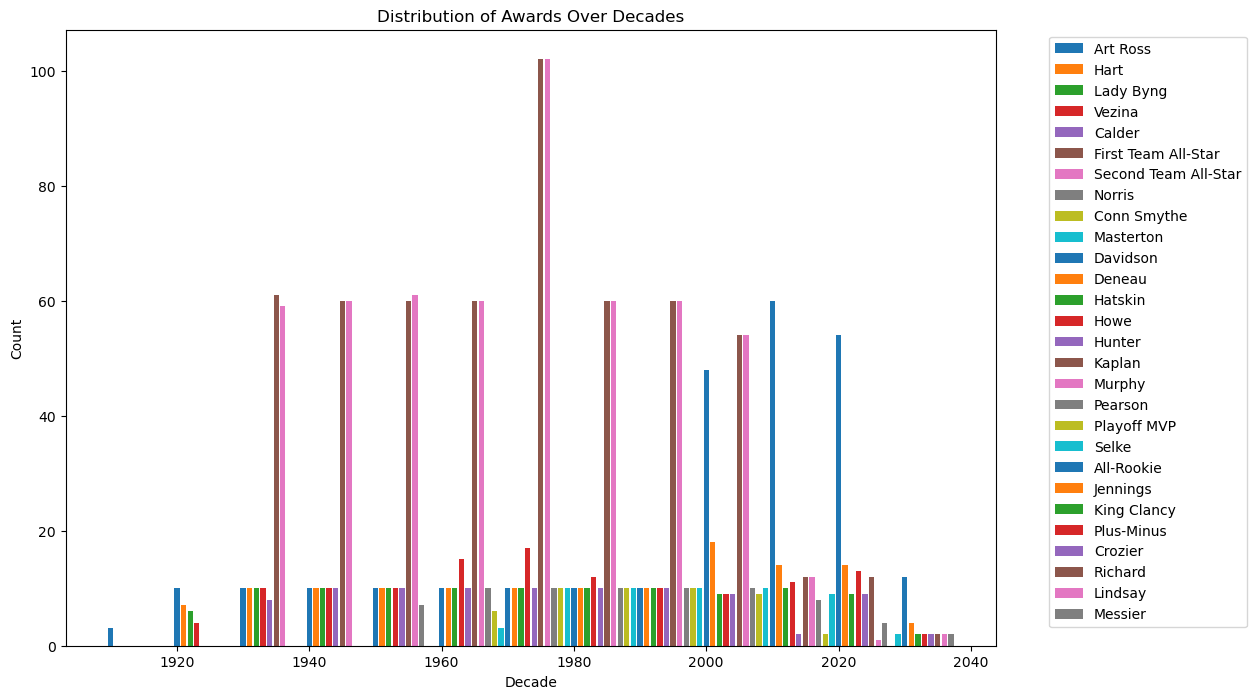

In [81]:
# Visualize player award distribution over decades 
# Set up the plot
plt.figure(figsize=(12, 8))


# Define the categories
awards = ['Art Ross', 'Hart', 'Lady Byng', 'Vezina', 'Calder',
       'First Team All-Star', 'Second Team All-Star', 'Norris',
       'Conn Smythe', 'Masterton', 'Davidson', 'Deneau', 'Hatskin',
       'Howe', 'Hunter', 'Kaplan', 'Murphy', 'Pearson', 'Playoff MVP',
       'Selke', 'All-Rookie', 'Jennings', 'King Clancy', 'Plus-Minus',
       'Crozier', 'Richard', 'Lindsay', 'Messier']

# Plot each category for each decade
for i, award in enumerate(awards):
    award_data = grouped_data[grouped_data['award'] == award]
    plt.bar(
        award_data['decade'] + i,
        award_data['count'],
        label=award
    )
# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Distribution of Awards Over Decades')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

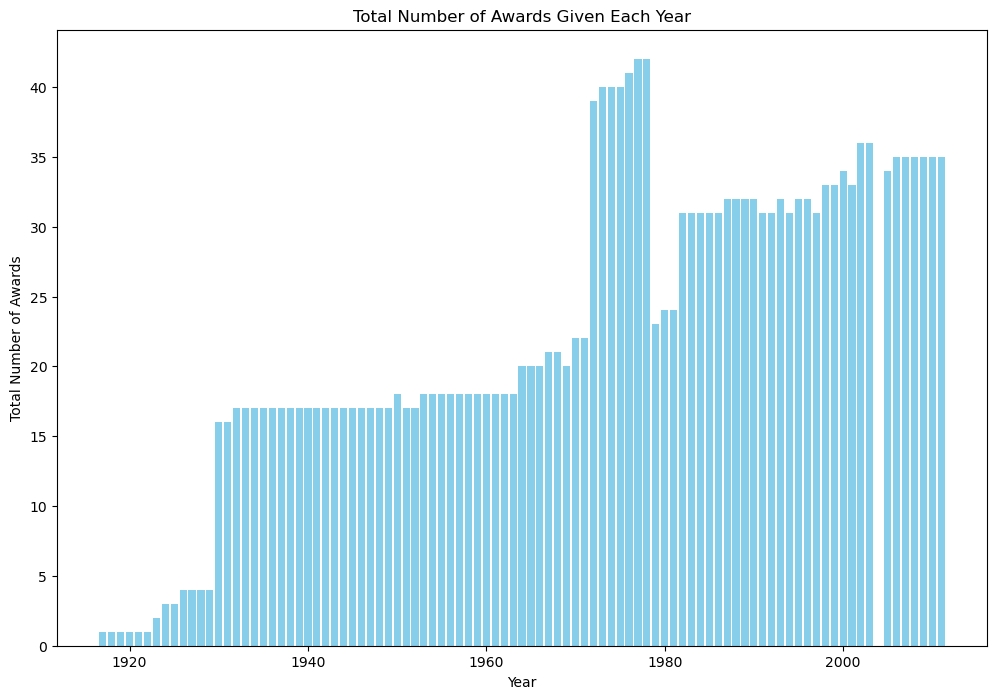

In [12]:
# Individual player awards

# Merge data to find player names
merged_player_data = pd.merge(master_data, player_awards_data, on='playerID')
#merged_player_data

# Find the players who won awards
players_with_awards = merged_player_data[pd.notnull(merged_player_data['award'])]
players_with_awards

# Merge first and last name columns to create 'player_name'
players_with_awards['player_name'] = players_with_awards['firstName'] + ' ' + players_with_awards['lastName']

# Create a new dataframe 
player_awards_summary = players_with_awards[['player_name', 'award', 'year']]

player_awards_summary

# Group by 'player_name', 'award', and 'year' and count the occurances 
total_awards_by_year = (
    player_awards_summary.groupby('year')['award']
    .count()
    .reset_index(name='total_awards_count')
)

# Plot a stacked bar chart
plt.figure(figsize=(12, 8))

plt.bar(total_awards_by_year['year'], total_awards_by_year['total_awards_count'], color='skyblue')

plt.xlabel('Year')
plt.ylabel('Total Number of Awards')
plt.title('Total Number of Awards Given Each Year')

plt.show()

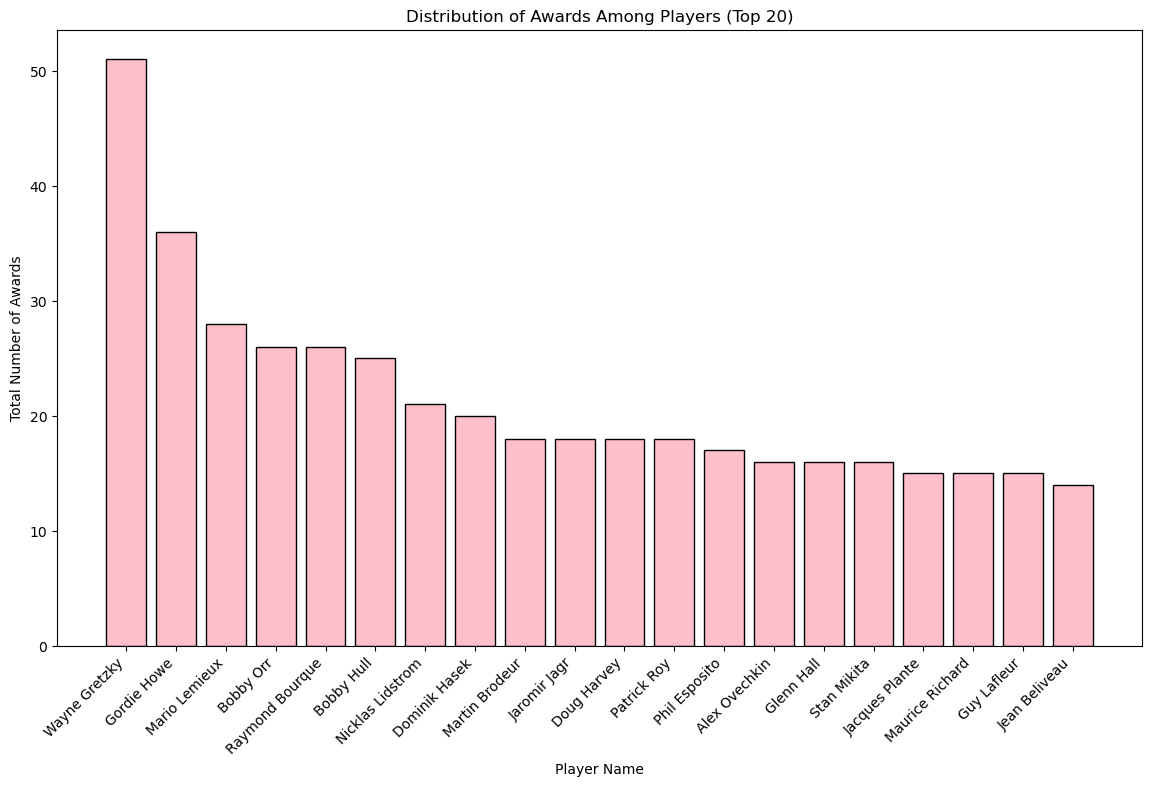

In [27]:
# Count the number of awards won by each player
player_awards_count = (
    players_with_awards.groupby('player_name')['award']
    .count()
    .reset_index(name='total_awards_count')
)

# Sort players by the number of awards won
sorted_players = player_awards_count.sort_values(by='total_awards_count', ascending=False)

# Visualize the distribution of awards among players
plt.figure(figsize=(14, 8))
plt.bar(sorted_players['player_name'][:20], sorted_players['total_awards_count'][:20], edgecolor='black', color='pink')
plt.xlabel('Player Name')
plt.ylabel('Total Number of Awards')
plt.title('Distribution of Awards Among Players (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.show()


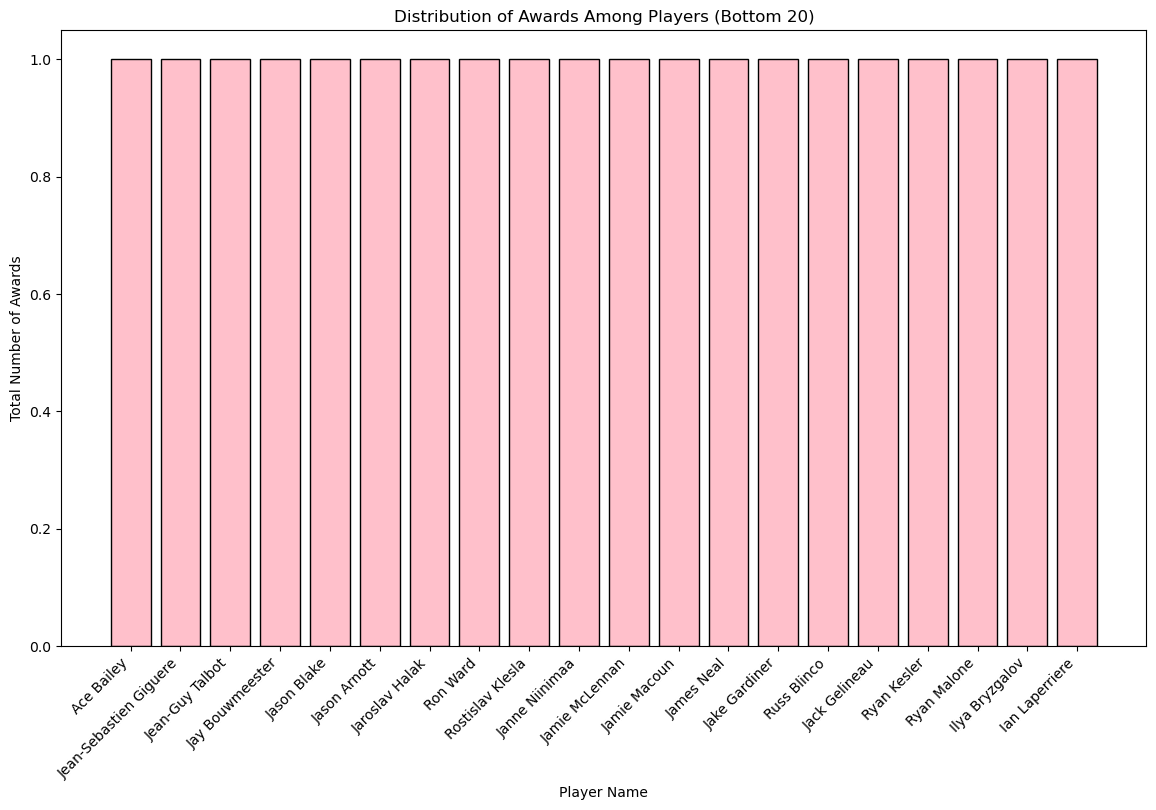

In [28]:
# Sort players by the number of awards won in ascending order to get the bottom 20
bottom_sorted_players = player_awards_count.sort_values(by='total_awards_count', ascending=True)

# Visualize the distribution of awards among players (bottom 20)
plt.figure(figsize=(14, 8))
plt.bar(bottom_sorted_players['player_name'][:20], bottom_sorted_players['total_awards_count'][:20], edgecolor='black', color='pink')
plt.xlabel('Player Name')
plt.ylabel('Total Number of Awards')
plt.title('Distribution of Awards Among Players (Bottom 20)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [25]:
# Filter awards data for Wayne Gretzky
wayne_gretzky_awards = players_with_awards[players_with_awards['player_name'] == 'Wayne Gretzky']

# Display the relevant information
wayne_gretzky_awards[['year', 'award']]


,year,award
657,1979,Hart
658,1979,Lady Byng
659,1979,Second Team All-Star
660,1980,Art Ross
661,1980,First Team All-Star
662,1980,Hart
663,1981,Art Ross
664,1981,First Team All-Star
665,1981,Hart
666,1981,Pearson


In [29]:
# Find information about Wayne Gretzky
wayne_gretzky_info = players_with_awards[players_with_awards['player_name'] == 'Wayne Gretzky']

# Count the number of awards won by Wayne Gretzky
wayne_gretzky_awards_count = wayne_gretzky_info['award'].count()

# Calculate the percentage of total awards won by Wayne Gretzky
total_awards = player_awards_count['total_awards_count'].sum()
percentage_awards_won_by_gretzky = (wayne_gretzky_awards_count / total_awards) * 100

print(f"Wayne Gretzky won {wayne_gretzky_awards_count} awards, which is {percentage_awards_won_by_gretzky:.2f}% of the total awards.")


Wayne Gretzky won 51 awards, which is 2.44% of the total awards.


In [30]:
# Filter Wayne Gretzky's awards in the 80s
gretzky_80s_info = wayne_gretzky_info[(wayne_gretzky_info['year'] >= 1980) & (wayne_gretzky_info['year'] <= 1989)]

# Count the number of awards won by Wayne Gretzky in the 80s
gretzky_80s_awards_count = gretzky_80s_info['award'].count()

# Calculate the percentage of total awards won by Wayne Gretzky in the 80s
percentage_awards_won_by_gretzky_80s = (gretzky_80s_awards_count / total_awards) * 100

print(f"Wayne Gretzky won {gretzky_80s_awards_count} awards in the 80s, which is {percentage_awards_won_by_gretzky_80s:.2f}% of the total awards in that decade.")


Wayne Gretzky won 36 awards in the 80s, which is 1.72% of the total awards in that decade.


In [31]:
# Calculate the percentage of total awards won by each player
sorted_players['percentage_of_total_awards'] = (sorted_players['total_awards_count'] / total_awards) * 100

# Find the player with the highest percentage of total awards
top_player = sorted_players.iloc[0]

print(f"{top_player['player_name']} won the highest percentage of awards of all time, with {top_player['percentage_of_total_awards']:.2f}% of total awards.")


Wayne Gretzky won the highest percentage of awards of all time, with 2.44% of total awards.


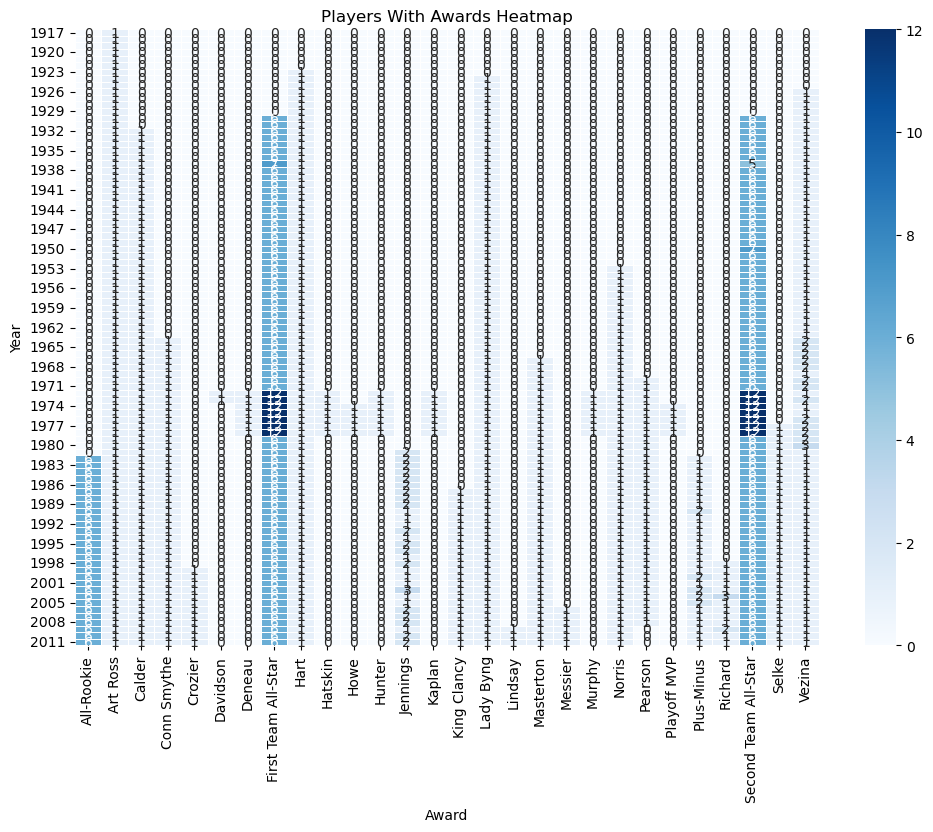

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to create a matrix for the heatmap
heatmap_data = players_with_awards.pivot_table(index='year', columns='award', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', linewidths=.5)

plt.title('Players With Awards Heatmap')
plt.xlabel('Award')
plt.ylabel('Year')
plt.show()


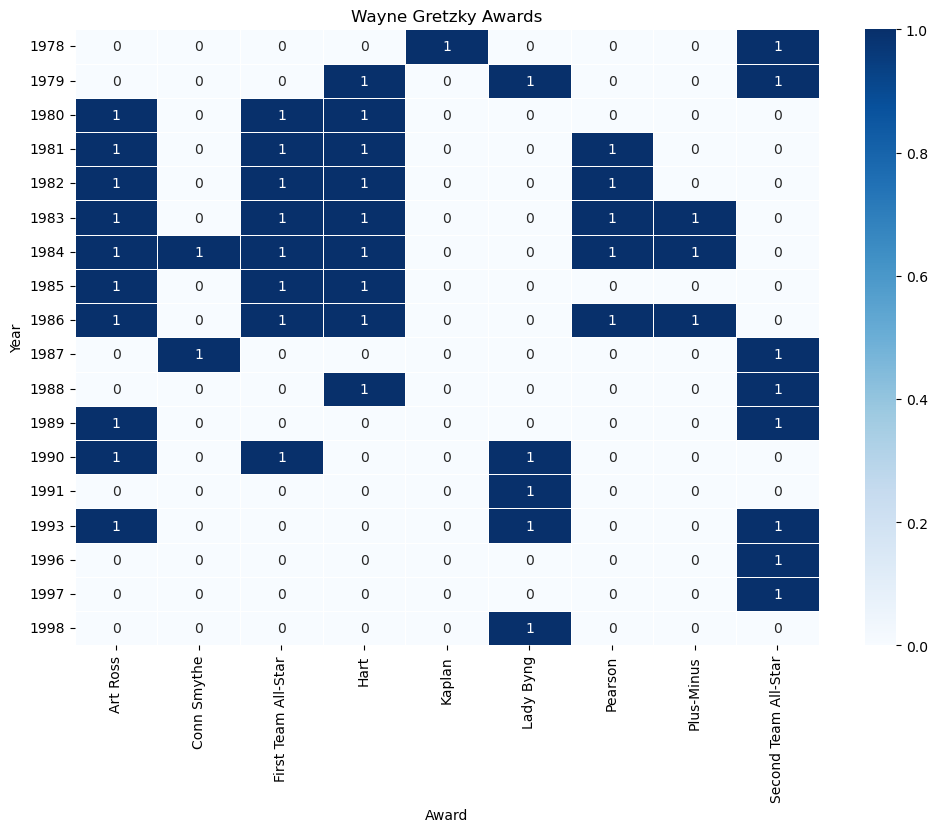

In [47]:
# Your data here
players_with_awards = wayne_gretzky_awards

# Filter data for Wayne Gretzky
wayne_gretzky_awards = players_with_awards[players_with_awards['player_name'] == 'Wayne Gretzky']

# Pivot the data to create a matrix for the heatmap
heatmap_data = wayne_gretzky_awards.pivot_table(index='year', columns='award', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', linewidths=.5)

plt.title('Wayne Gretzky Awards')
plt.xlabel('Award')
plt.ylabel('Year')
plt.show()

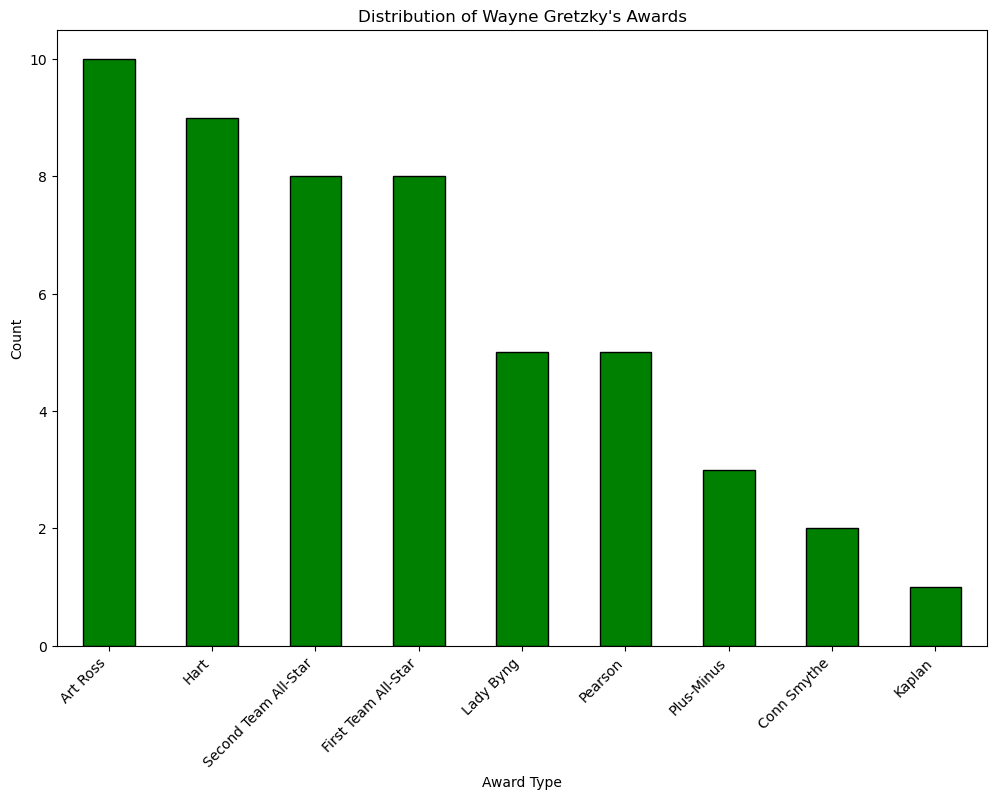

In [39]:
# Bar chart for the distribution of types of awards
plt.figure(figsize=(12, 8))
wayne_gretzky_awards['award'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Award Type')
plt.ylabel('Count')
plt.title('Distribution of Wayne Gretzky\'s Awards')
plt.xticks(rotation=45, ha='right')
plt.show()


<Figure size 1400x800 with 0 Axes>

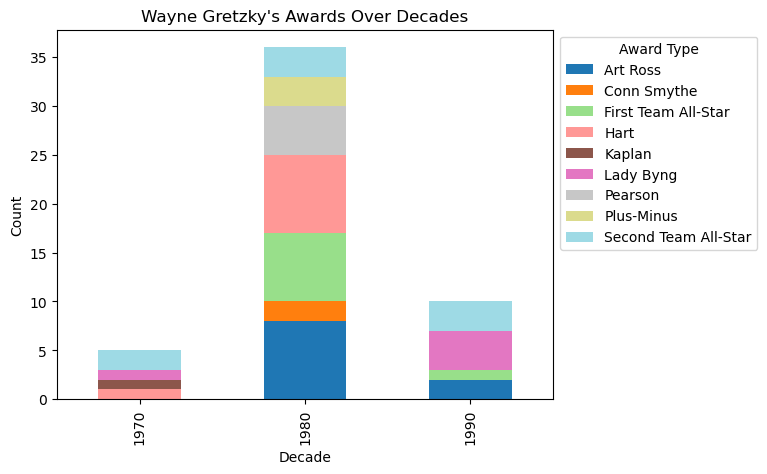

In [40]:
# Extract the decade from the 'year' column
wayne_gretzky_awards['decade'] = (wayne_gretzky_awards['year'] // 10) * 10

# Group by 'decade' and 'award' to count the occurrences
decadal_counts = wayne_gretzky_awards.groupby(['decade', 'award']).size().unstack(fill_value=0)

# Stacked bar chart for the decadal analysis
plt.figure(figsize=(14, 8))
decadal_counts.plot(kind='bar', stacked=True, cmap='tab20')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Wayne Gretzky\'s Awards Over Decades')
plt.legend(title='Award Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


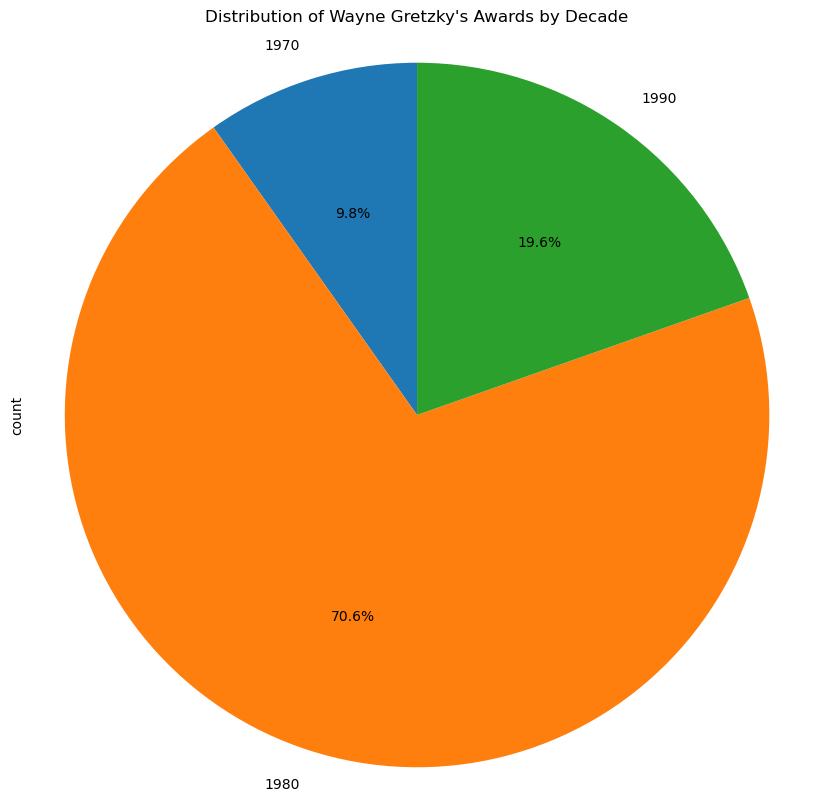

In [49]:
# Extract decade information
wayne_gretzky_awards['decade'] = (wayne_gretzky_awards['year'] // 10) * 10

# Pie chart for distribution of awards by decade
plt.figure(figsize=(10, 10))
wayne_gretzky_awards['decade'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Wayne Gretzky\'s Awards by Decade')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


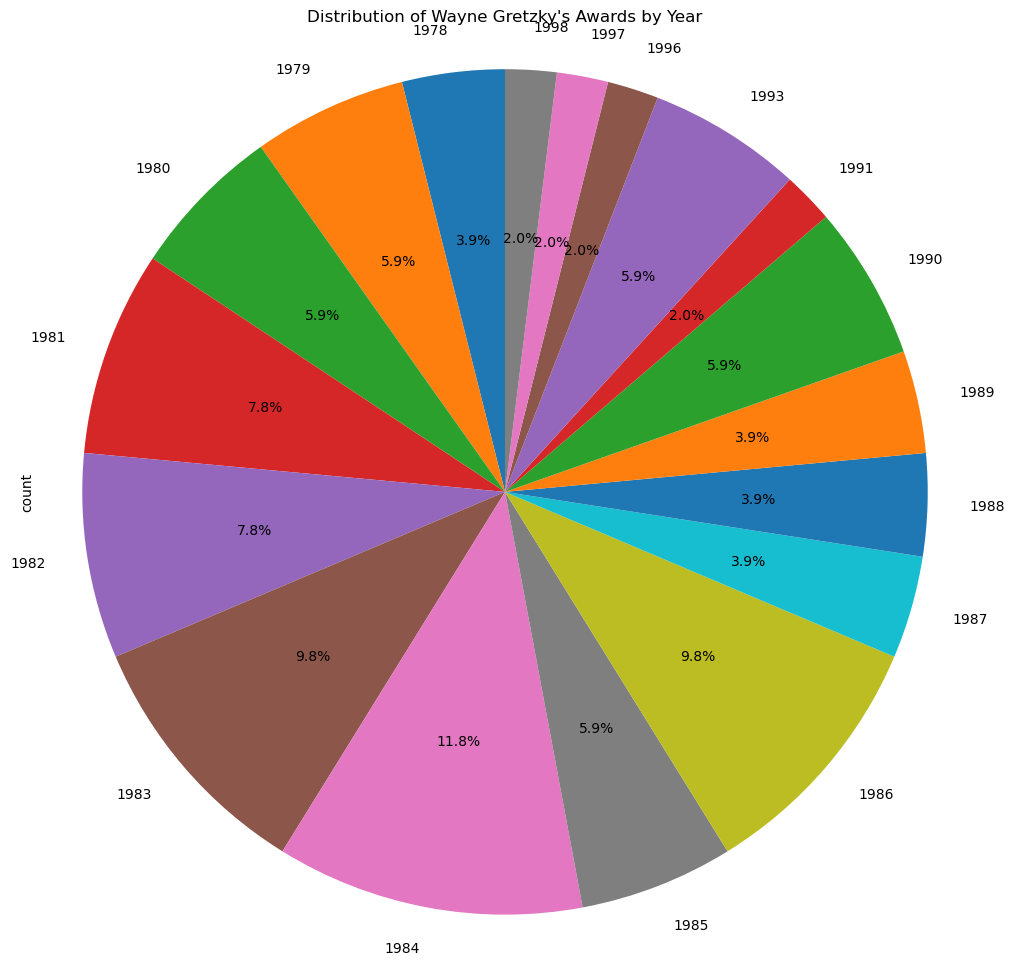

In [50]:
# Pie chart for distribution of awards by year
plt.figure(figsize=(12, 12))
wayne_gretzky_awards['year'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Wayne Gretzky\'s Awards by Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Mean Awards per Year: 2.8333333333333335
Median Awards per Year: 3.0
Standard Deviation of Awards per Year: 1.5048939771136507
Mode of Awards per Year: 3
Range of Awards per Year: 5


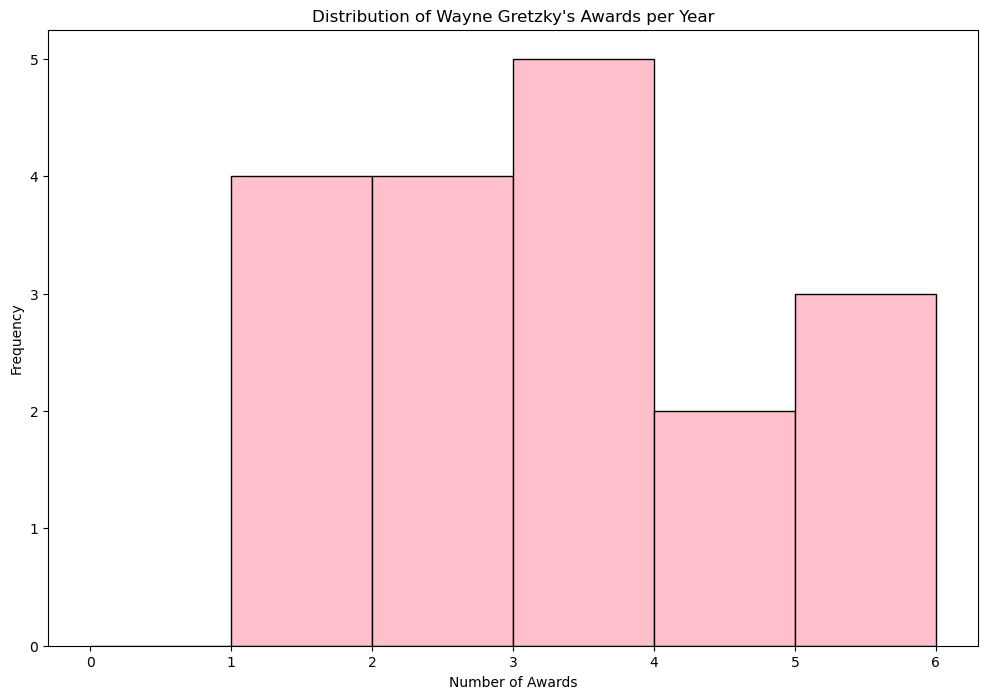

In [69]:
# Descriptive Statistics
mean_awards = wayne_gretzky_awards.groupby('year').size().mean()
median_awards = wayne_gretzky_awards.groupby('year').size().median()
std_dev_awards = wayne_gretzky_awards.groupby('year').size().std()
mode_awards = wayne_gretzky_awards.groupby('year').size().mode().values[0]
range_awards = wayne_gretzky_awards.groupby('year').size().max() - wayne_gretzky_awards.groupby('year').size().min()

print("Mean Awards per Year:", mean_awards)
print("Median Awards per Year:", median_awards)
print("Standard Deviation of Awards per Year:", std_dev_awards)
print("Mode of Awards per Year:", mode_awards)
print("Range of Awards per Year:", range_awards)

# Histogram
plt.figure(figsize=(12, 8))
plt.hist(wayne_gretzky_awards.groupby('year').size(), bins=np.arange(0, wayne_gretzky_awards.groupby('year').size().max() + 1, 1), color='pink', edgecolor='black')
plt.title('Distribution of Wayne Gretzky\'s Awards per Year')
plt.xlabel('Number of Awards')
plt.ylabel('Frequency')
plt.show()


In [ ]:
players_with_awards

In [64]:
# Clean up players_with_awards
# Check the number of duplicate rows
duplicate_rows = players_with_awards[players_with_awards.duplicated()]

# Print the duplicate rows
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

# Check the total number of duplicate rows
print(f"\nTotal number of duplicate rows: {duplicate_rows.shape[0]}")


Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [playerID, coachID, hofID, firstName, lastName, nameNote, nameGiven, nameNick, height, weight, shootCatch, legendsID, ihdbID, hrefID, firstNHL, lastNHL, firstWHA, lastWHA, pos_x, birthYear, birthMon, birthDay, birthCountry, birthState, birthCity, deathYear, deathMon, deathDay, deathCountry, deathState, deathCity, award, year, lgID, note, pos_y, player_name, decade]
Index: []

[0 rows x 38 columns]

Total number of duplicate rows: 0


In [65]:
# Check for missing values in the dataframe
missing_values = players_with_awards.isnull().sum()

# Print the columns with missing values and their respective counts
print("Columns with missing values and their counts:")
print(missing_values[missing_values > 0])


Columns with missing values and their counts:
nameNote        51
deathYear       51
deathMon        51
deathDay        51
deathCountry    51
deathState      51
deathCity       51
note            50
pos_y           35
dtype: int64


In [66]:
# Drop rows with missing values in specific columns
columns_with_missing_values = ['nameNote', 'deathYear', 'deathMon', 'deathDay', 'deathCountry', 'deathState', 'deathCity', 'note', 'pos_y']
players_with_awards_cleaned = players_with_awards.dropna(subset=columns_with_missing_values)

# Check if there are any missing values after dropping
remaining_missing_values = players_with_awards_cleaned.isnull().sum()
print("Remaining missing values after dropping rows:")
print(remaining_missing_values[remaining_missing_values > 0])


Remaining missing values after dropping rows:
Series([], dtype: int64)


Column names of players_with_awards: Index(['playerID', 'coachID', 'hofID', 'firstName', 'lastName', 'nameNote',
       'nameGiven', 'nameNick', 'height', 'weight', 'shootCatch', 'legendsID',
       'ihdbID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA', 'lastWHA',
       'pos_x', 'birthYear', 'birthMon', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMon', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'award', 'year', 'lgID',
       'note', 'pos_y', 'player_name', 'decade'],
      dtype='object')
Column names of players_without_gretzky: Index(['playerID', 'coachID', 'hofID', 'firstName', 'lastName', 'nameNote',
       'nameGiven', 'nameNick', 'height', 'weight', 'shootCatch', 'legendsID',
       'ihdbID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA', 'lastWHA',
       'pos_x', 'birthYear', 'birthMon', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMon', 'deathDay',
       'deathCountry', 'deathState', 'd

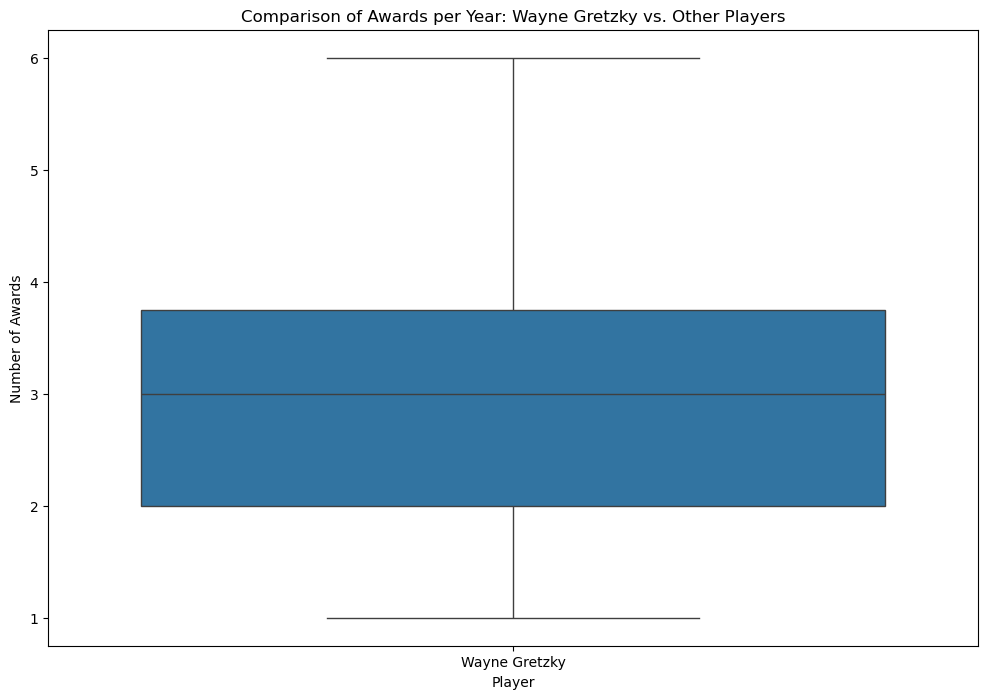

In [68]:
# Check the column names of players_with_awards
print("Column names of players_with_awards:", players_with_awards.columns)

# Exclude Wayne Gretzky from players_with_awards
players_without_gretzky = players_with_awards[players_with_awards['player_name'] != 'Wayne Gretzky']

# Calculate mean awards per year
mean_awards_gretzky = wayne_gretzky_awards.groupby('year').size().mean()

# Check the column names of players_without_gretzky
print("Column names of players_without_gretzky:", players_without_gretzky.columns)

# Perform t-test
t_stat, p_value = ttest_ind(wayne_gretzky_awards.groupby('year').size(), players_without_gretzky.groupby('year').size())

# Print results
print("Mean Awards per Year - Wayne Gretzky:", mean_awards_gretzky)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='player_name', y='awards_count', data=pd.concat([wayne_gretzky_awards.groupby('year').size().reset_index(name='awards_count').assign(player_name='Wayne Gretzky'),
                                                               players_without_gretzky.groupby('year').size().reset_index(name='awards_count').assign(player_name='Other Players')]))
plt.title('Comparison of Awards per Year: Wayne Gretzky vs. Other Players')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.show()


Olympic years vs non-Olympic years

In [88]:
# Find Olympic years

# Create a list of Olympic years (every four years starting in 1924, excluding 1940 and 1944)
actual_olympic_years = list(range(1924, 2025, 4))
actual_olympic_years.remove(1940)
actual_olympic_years.remove(1944)

actual_olympic_years

actual_olympic_years
# Filter the DataFrame for Olympic years
awards_olympic = total_awards_by_year[total_awards_by_year['year'].isin(actual_olympic_years)]

# Filter the DataFrame for non-Olympic years
awards_non_olympic = total_awards_by_year[~total_awards_by_year['year'].isin(actual_olympic_years)]

print("DataFrame for Olympic Years:")
print(awards_olympic)

print("\nDataFrame for Non-Olympic Years:")
print(awards_non_olympic)

DataFrame for Olympic Years:
    year  total_awards_count
7   1924                   3
11  1928                   4
15  1932                  17
19  1936                  17
31  1948                  17
35  1952                  17
39  1956                  18
43  1960                  18
47  1964                  20
51  1968                  21
55  1972                  39
59  1976                  41
63  1980                  24
67  1984                  31
71  1988                  32
75  1992                  31
79  1996                  32
83  2000                  34
90  2008                  35

DataFrame for Non-Olympic Years:
    year  total_awards_count
0   1917                   1
1   1918                   1
2   1919                   1
3   1920                   1
4   1921                   1
..   ...                 ...
88  2006                  35
89  2007                  35
91  2009                  35
92  2010                  35
93  2011                  35

[75 rows

In [92]:
# Descriptive statistics for Olympic years
olympic_stats = awards_olympic['total_awards_count'].describe()

# Descriptive statistics for Non-Olympic years
non_olympic_stats = awards_non_olympic['total_awards_count'].describe()

# Create a formatted string for display
olympic_stats_str = f"""
Descriptive Statistics for Olympic Years:
  Mean:      {olympic_stats['mean']}
  Median:    {olympic_stats['50%']}
  Std Dev:   {olympic_stats['std']}
  Min:       {olympic_stats['min']}
  Max:       {olympic_stats['max']}
"""

non_olympic_stats_str = f"""
Descriptive Statistics for Non-Olympic Years:
  Count:     {non_olympic_stats['count']}
  Mean:      {non_olympic_stats['mean']}
  Std Dev:   {non_olympic_stats['std']}
  Min:       {non_olympic_stats['min']}
  25%:       {non_olympic_stats['25%']}
  50%:       {non_olympic_stats['50%']}
  75%:       {non_olympic_stats['75%']}
  Max:       {non_olympic_stats['max']}
"""

# Print the formatted strings
print(olympic_stats_str)
print(non_olympic_stats_str)



Descriptive Statistics for Olympic Years:
  Mean:      23.736842105263158
  Median:    21.0
  Std Dev:   10.78497980868227
  Min:       3.0
  Max:       41.0


Descriptive Statistics for Non-Olympic Years:
  Count:     75.0
  Mean:      21.866666666666667
  Std Dev:   11.396221912277499
  Min:       1.0
  25%:       17.0
  50%:       18.0
  75%:       32.0
  Max:       42.0



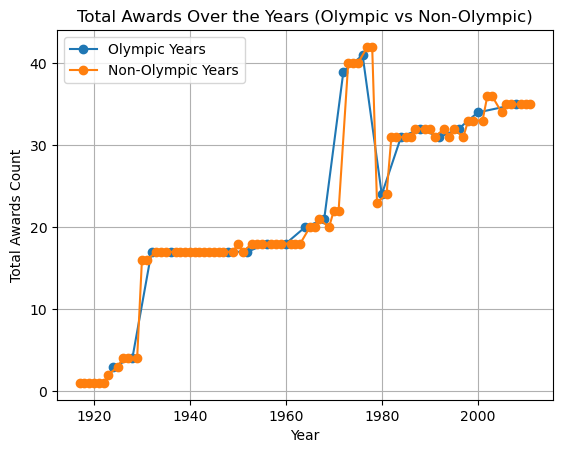

In [89]:
# Plotting DataFrame for Olympic Years
plt.plot(awards_olympic['year'], awards_olympic['total_awards_count'], label='Olympic Years', marker='o')

# Plotting DataFrame for Non-Olympic Years
plt.plot(awards_non_olympic['year'], awards_non_olympic['total_awards_count'], label='Non-Olympic Years', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Awards Count')
plt.title('Total Awards Over the Years (Olympic vs Non-Olympic)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

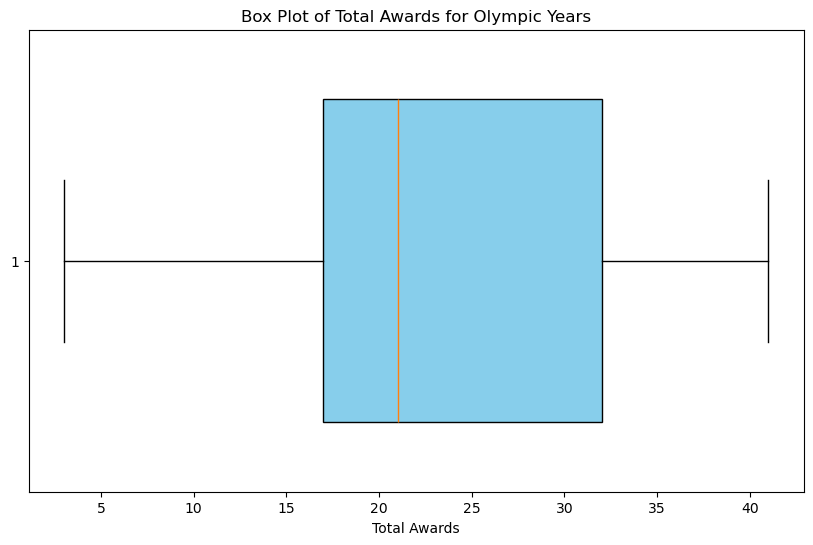

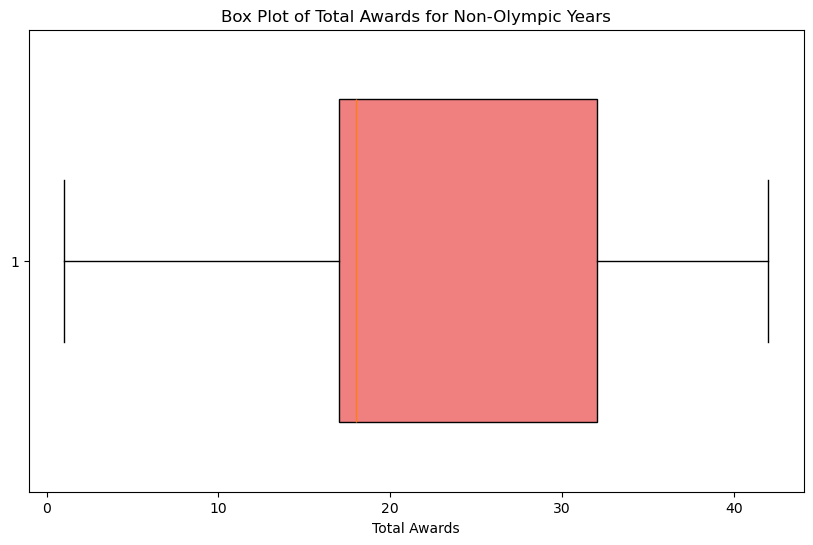

In [93]:
# No real insights, let's check for outlying years

# Create a box plot for Olympic years
plt.figure(figsize=(10, 6))
plt.boxplot(awards_olympic['total_awards_count'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Total Awards for Olympic Years')
plt.xlabel('Total Awards')
plt.show()

# Create a box plot for Non-Olympic years
plt.figure(figsize=(10, 6))
plt.boxplot(awards_non_olympic['total_awards_count'], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Box Plot of Total Awards for Non-Olympic Years')
plt.xlabel('Total Awards')
plt.show()